In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [152]:
data = pd.read_excel('data_mag_rad.xls')
data.describe()

,Team,point,y,x,hight,Igamma,data
count,11.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,6.000000,15.515432,44.785019,34.012791,382.453704,11.498148,48912.811728
std,3.316625,8.948930,0.006425,0.008246,68.078499,3.422788,176.810576
min,1.000000,1.000000,44.770556,33.993889,251.000000,3.000000,48283.000000
25%,NaN,8.000000,44.780208,34.006875,324.750000,9.500000,48807.000000
50%,NaN,15.000000,44.785000,34.012500,381.500000,12.000000,48827.500000
75%,NaN,23.000000,44.790833,34.018125,437.500000,14.000000,49007.250000
max,11.000000,36.000000,44.796944,34.032500,550.000000,19.000000,49850.000000


# Task 3

In [168]:
step = 7 
def normalize(list_data):
    minimum = min(list_data)
    maximum = max(list_data)
    return map(lambda i: float(maximum-i)/(maximum-minimum),list_data)

def sin_normalize(list_data):
    return map(lambda i: np.sin(i), list_data)

def move_window(list_data, current_possition, step):
    return list_data[current_possition:current_possition+step]

def define_correlation(list_data1,list_data2):
    list_coeff = []
    for i in range(len(list_data1)/step):
        temp_1 = move_window(list_data1,i,step)
        temp_2 = move_window(list_data2,i,step)
        list_coeff.append(np.corrcoef(temp_1,temp_2)[0][1])
    plt.plot(range(0,len(list_data1)-step, step), list_coeff, 'r-',label = 'correlation')
    plt.plot(range(len(list_data1)), list_data1, 'b-',label = 'gamma')
    plt.plot(range(len(list_data2)), list_data2, 'g-',label = 'rad')
    plt.plot(range(len(list_data2)), [0 for x in list_data1], 'r--',label = 'zero')
    plt.axis([0,335,-1.5,1.5])
    plt.legend(loc='best')

In [176]:
plt.figure(figsize=(20,7))
data1 = normalize(data.Igamma)
data2 = normalize(data.data)
define_correlation(data1,data2)


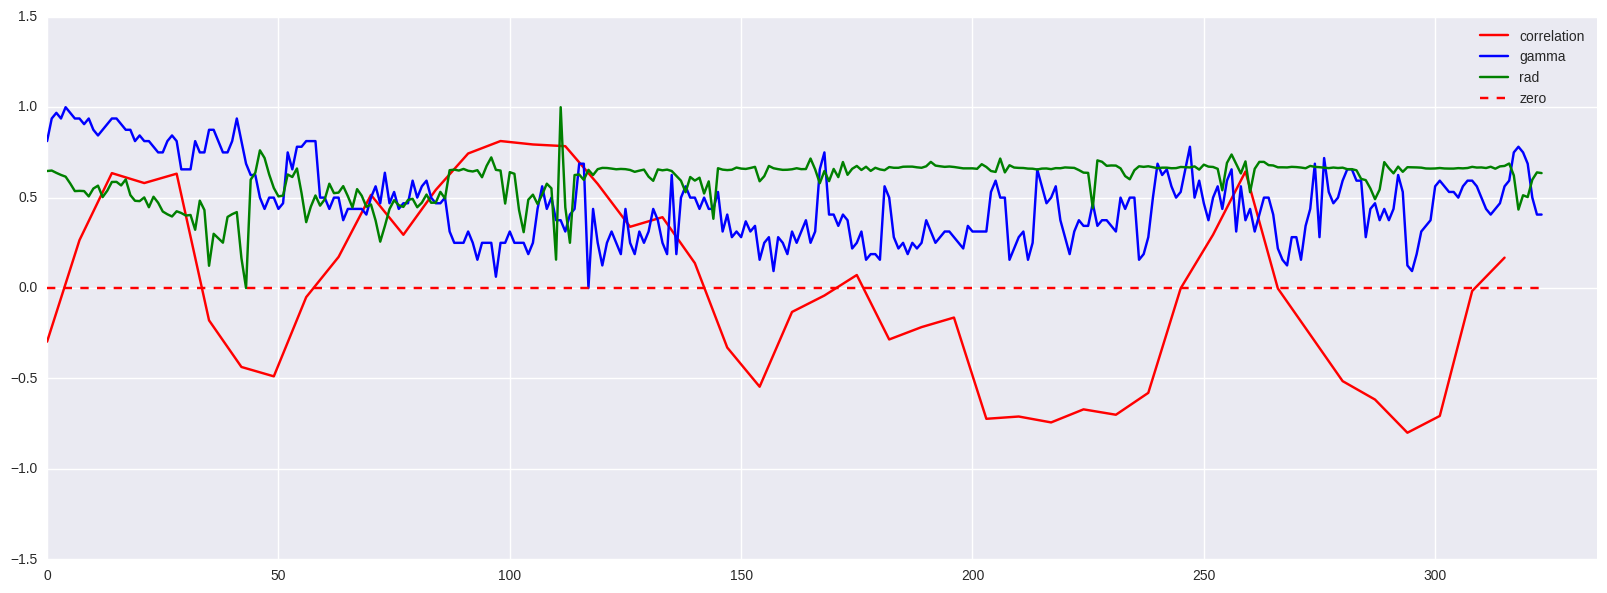

In [177]:
plt.show()

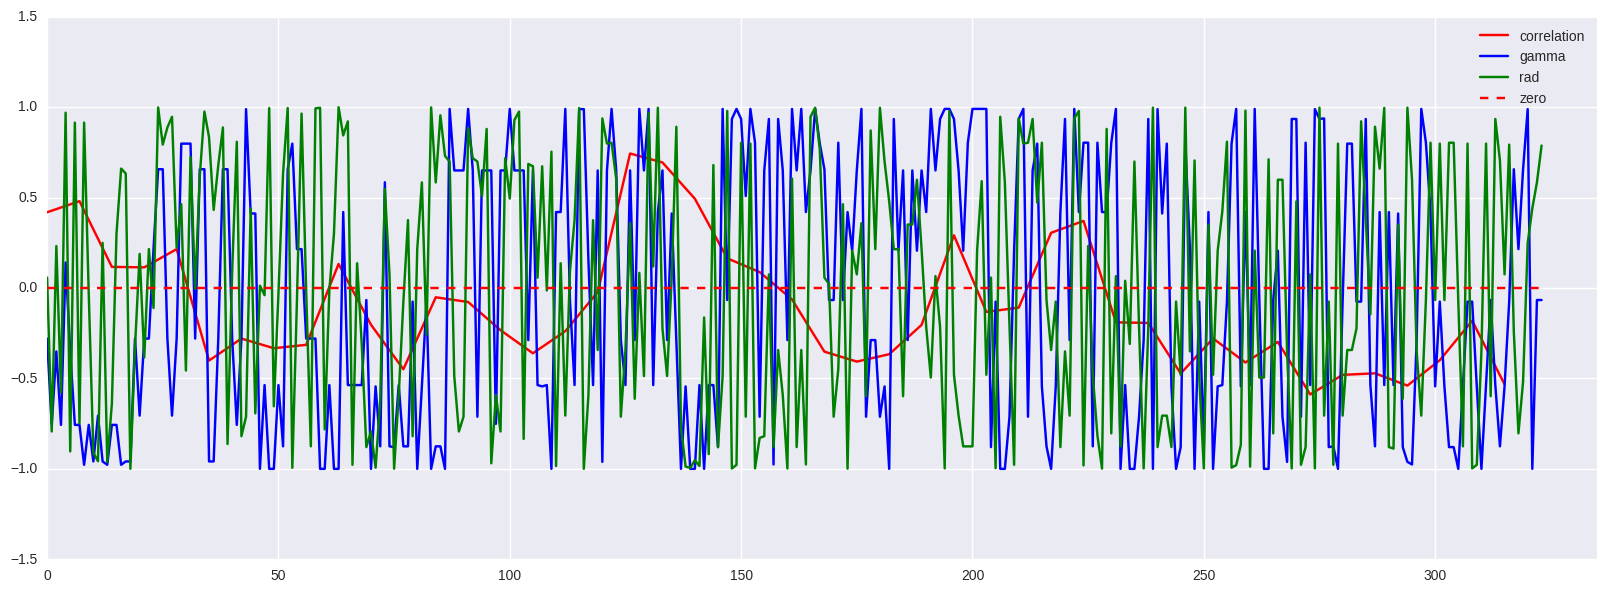

In [178]:
plt.figure(figsize=(20,7))
data1 = sin_normalize(data.Igamma)
data2 = sin_normalize(data.data)
define_correlation(data1,data2)
plt.show()

# Task 1 